In [30]:
# Import thr dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [38]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [31]:
# Create a set of random latitide and longitude combinations.
lats = np.random.uniform(low = -90.000, high = 90.000, size = 1500)
lngs = np.random.uniform(low = -180.000, high = 180.000, size = 1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [49]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [50]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [33]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [34]:
# Create a list for holding the cities.
cities= []

# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then add it to the city list.
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count.
len(cities)

631

In [35]:
# Import the datetime module from the datetime library.
from datetime import datetime


In [40]:
# Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval")
print("------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval
------------------------
Processing Record 1 of Set 1 | mustasaari
Processing Record 2 of Set 1 | bathsheba
Processing Record 3 of Set 1 | pevek
Processing Record 4 of Set 1 | aginskoye
Processing Record 5 of Set 1 | sao felix do xingu
Processing Record 6 of Set 1 | saint-philippe
Processing Record 7 of Set 1 | ushuaia
Processing Record 8 of Set 1 | maltahohe
Processing Record 9 of Set 1 | waddan
Processing Record 10 of Set 1 | punta arenas
Processing Record 11 of Set 1 | kushiro
Processing Record 12 of Set 1 | sentyabrskiy
City not found. Skipping...
Processing Record 13 of Set 1 | cabo san lucas
Processing Record 14 of Set 1 | saint-joseph
Processing Record 15 of Set 1 | tias
Processing Record 16 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 17 of Set 1 | ust-tsilma
Processing Record 18 of Set 1 | mataura
Processing Record 19 of Set 1 | beidao
Processing Record 20 of Set 1 | butaritari
Processing Record 21 of Set 1 | vaini
Processi

Processing Record 35 of Set 4 | shenjiamen
Processing Record 36 of Set 4 | mitsamiouli
Processing Record 37 of Set 4 | provideniya
Processing Record 38 of Set 4 | caravelas
Processing Record 39 of Set 4 | airai
Processing Record 40 of Set 4 | yeppoon
Processing Record 41 of Set 4 | xining
Processing Record 42 of Set 4 | east london
Processing Record 43 of Set 4 | sangar
Processing Record 44 of Set 4 | nizhneyansk
City not found. Skipping...
Processing Record 45 of Set 4 | san carlos de bariloche
Processing Record 46 of Set 4 | mahebourg
Processing Record 47 of Set 4 | bengkulu
Processing Record 48 of Set 4 | noyabrsk
Processing Record 49 of Set 4 | kazachinskoye
Processing Record 50 of Set 4 | udachnyy
Processing Record 1 of Set 5 | santa eulalia del rio
City not found. Skipping...
Processing Record 2 of Set 5 | lasa
Processing Record 3 of Set 5 | tasiilaq
Processing Record 4 of Set 5 | tarakan
Processing Record 5 of Set 5 | ostrovnoy
Processing Record 6 of Set 5 | bahia blanca
Process

Processing Record 23 of Set 8 | chokurdakh
Processing Record 24 of Set 8 | odesskoye
Processing Record 25 of Set 8 | opuwo
Processing Record 26 of Set 8 | tabuk
Processing Record 27 of Set 8 | okhotsk
Processing Record 28 of Set 8 | magdeburg
Processing Record 29 of Set 8 | tomatlan
Processing Record 30 of Set 8 | armacao dos buzios
City not found. Skipping...
Processing Record 31 of Set 8 | igarka
Processing Record 32 of Set 8 | castro
Processing Record 33 of Set 8 | arlit
Processing Record 34 of Set 8 | kropotkin
Processing Record 35 of Set 8 | kharhial
Processing Record 36 of Set 8 | colares
Processing Record 37 of Set 8 | la ronge
Processing Record 38 of Set 8 | asau
Processing Record 39 of Set 8 | skjervoy
Processing Record 40 of Set 8 | big rapids
Processing Record 41 of Set 8 | attawapiskat
City not found. Skipping...
Processing Record 42 of Set 8 | nizhniy odes
Processing Record 43 of Set 8 | omura
Processing Record 44 of Set 8 | el alto
Processing Record 45 of Set 8 | annecy-l

Processing Record 12 of Set 12 | saint-augustin
Processing Record 13 of Set 12 | voyvozh
Processing Record 14 of Set 12 | bandarbeyla
Processing Record 15 of Set 12 | sur
Processing Record 16 of Set 12 | harnosand
Processing Record 17 of Set 12 | tual
Processing Record 18 of Set 12 | zharkent
Processing Record 19 of Set 12 | santa marta
Processing Record 20 of Set 12 | eloy
Processing Record 21 of Set 12 | coihaique
Processing Record 22 of Set 12 | jaca
Processing Record 23 of Set 12 | nioro
Processing Record 24 of Set 12 | mahajanga
Processing Record 25 of Set 12 | lagoa
Processing Record 26 of Set 12 | togur
Processing Record 27 of Set 12 | pereira barreto
Processing Record 28 of Set 12 | morro bay
Processing Record 29 of Set 12 | yola
Processing Record 30 of Set 12 | aldan
Processing Record 31 of Set 12 | ketchikan
Processing Record 32 of Set 12 | miri
Processing Record 33 of Set 12 | karatuzskoye
Processing Record 34 of Set 12 | itaituba
Processing Record 35 of Set 12 | esperance
P

In [42]:
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Mustasaari,63.1142,21.6822,69.89,60,0,3.44,FI,2021-07-27 22:15:38
1,Bathsheba,13.2167,-59.5167,83.01,69,20,17.27,BB,2021-07-27 22:15:38
2,Pevek,69.7008,170.3133,34.07,94,100,10.40,RU,2021-07-27 22:15:38
3,Aginskoye,51.1000,114.5300,59.11,90,26,2.39,RU,2021-07-27 22:15:39
4,Sao Felix Do Xingu,-6.6447,-51.9950,80.78,37,0,1.54,BR,2021-07-27 22:15:39
5,Saint-Philippe,-21.3585,55.7679,67.55,85,50,14.20,RE,2021-07-27 22:15:39
6,Ushuaia,-54.8000,-68.3000,37.06,93,90,4.61,AR,2021-07-27 22:11:19
7,Maltahohe,-24.8333,16.9833,52.56,37,0,5.21,NA,2021-07-27 22:15:40
8,Waddan,29.1614,16.1390,79.14,47,0,16.62,LY,2021-07-27 22:15:40
9,Punta Arenas,-53.1500,-70.9167,42.91,87,75,10.36,CL,2021-07-27 22:15:40


In [43]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]

In [45]:
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Mustasaari,FI,2021-07-27 22:15:38,63.1142,21.6822,69.89,60,0,3.44
1,Bathsheba,BB,2021-07-27 22:15:38,13.2167,-59.5167,83.01,69,20,17.27
2,Pevek,RU,2021-07-27 22:15:38,69.7008,170.3133,34.07,94,100,10.40
3,Aginskoye,RU,2021-07-27 22:15:39,51.1000,114.5300,59.11,90,26,2.39
4,Sao Felix Do Xingu,BR,2021-07-27 22:15:39,-6.6447,-51.9950,80.78,37,0,1.54
5,Saint-Philippe,RE,2021-07-27 22:15:39,-21.3585,55.7679,67.55,85,50,14.20
6,Ushuaia,AR,2021-07-27 22:11:19,-54.8000,-68.3000,37.06,93,90,4.61
7,Maltahohe,NA,2021-07-27 22:15:40,-24.8333,16.9833,52.56,37,0,5.21
8,Waddan,LY,2021-07-27 22:15:40,29.1614,16.1390,79.14,47,0,16.62
9,Punta Arenas,CL,2021-07-27 22:15:40,-53.1500,-70.9167,42.91,87,75,10.36


In [47]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label = "City_ID")

In [51]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

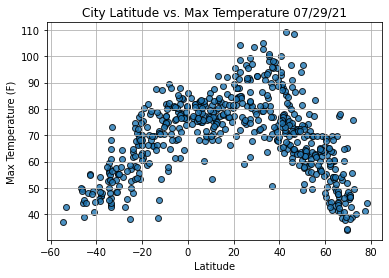

In [55]:
# Import time module.
import time

# Build the scatter plot for latitude vs max temperature.
plt.scatter(lats,
           max_temps,
           edgecolor = "black", linewidths = 1, marker = "o",
           alpha = 0.8, label = "Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature " + time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show the plot.
plt.show()

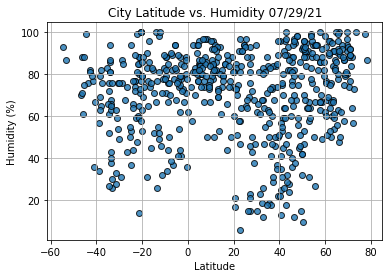

In [56]:
# Build the scatter plot for latitude vs max temperature.
plt.scatter(lats,
           humidity,
           edgecolor = "black", linewidths = 1, marker = "o",
           alpha = 0.8, label = "Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity " + time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show the plot.
plt.show()

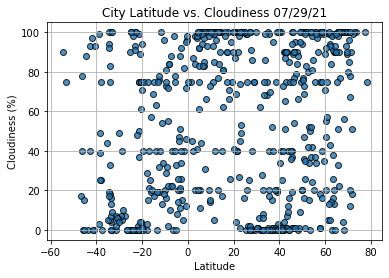

In [57]:
# Build the scatter plot for latitude vs max temperature.
plt.scatter(lats,
           cloudiness,
           edgecolor = "black", linewidths = 1, marker = "o",
           alpha = 0.8, label = "Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness " + time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show the plot.
plt.show()

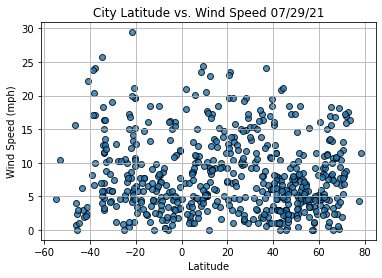

In [58]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()